# What Makes a Veteran?

Using data collected by the Economic Research Service titled *Atlas of Rural and Small-Town America* provided by Data.gov I would like to investigate the relationships between unemployment rates, poverty, job type, education and preponderance of veterans. As somebody with numerous veterans as both friends and family, with the vast majority coming from so-called "Rural and Small-Town America," I'd like to see if any correlation exists beyond my own anecdata.

The first step in this investigation will be to import the appropriate Python libraries:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

Then, using Pandas, we'll load the necessary csv files:

In [3]:
income_df = pd.read_csv('Income.csv')
jobs_df = pd.read_csv('Jobs.csv')
people_df = pd.read_csv('People.csv')
veterans_df = pd.read_csv('Veterans.csv')

Now we need to figure out what data to use from this massive amount of data we want to work with. To begin doing this I want to take a look at the columns in each csv:

In [4]:
print('Income.csv:')
income_df.columns

Income.csv:


Index(['FIPS', 'State', 'County', 'Median_HH_Inc_ACS', 'PerCapitaInc',
       'Poverty_Rate_0_17_ACS', 'Poverty_Rate_ACS', 'Deep_Pov_All',
       'Deep_Pov_Children', 'NumAll_inPOV_ACS', 'PCTPOV017', 'POV017',
       'MedHHInc', 'POVALL', 'PCTPOVALL', 'Num_inPOV_0_17_ACS'],
      dtype='object')

In [5]:
print('Jobs.csv:')
jobs_df.columns

Jobs.csv:


Index(['FIPS', 'State', 'County', 'UnempRate2020', 'PctEmpChange1920',
       'UnempRate2019', 'PctEmpChange1819', 'UnempRate2018', 'UnempRate2017',
       'UnempRate2016', 'UnempRate2015', 'UnempRate2014', 'UnempRate2010',
       'UnempRate2007', 'PctEmpChange1020', 'PctEmpChange0720',
       'PctEmpChange0710', 'PctEmpAgriculture', 'PctEmpMining',
       'PctEmpConstruction', 'PctEmpManufacturing', 'PctEmpTrade',
       'PctEmpTrans', 'PctEmpInformation', 'PctEmpFIRE', 'PctEmpServices',
       'PctEmpGovt', 'NumCivEmployed', 'NumCivLaborForce2012',
       'NumUnemployed2011', 'UnempRate2012', 'NumEmployed2011',
       'NumEmployed2012', 'NumCivLaborForce2011', 'UnempRate2011',
       'NumUnemployed2010', 'NumEmployed2010', 'NumCivLaborForce2010',
       'NumUnemployed2009', 'NumEmployed2009', 'NumCivLaborForce2009',
       'NumUnemployed2008', 'UnempRate2013', 'NumEmployed2008',
       'NumCivLaborForce2008', 'UnempRate2009', 'UnempRate2008',
       'NumEmployed2016', 'NumEmployed202

In [6]:
print('People.csv:')
people_df.columns

People.csv:


Index(['FIPS', 'State', 'County', 'PopChangeRate1819', 'PopChangeRate1019',
       'TotalPopEst2019', 'NetMigrationRate1019', 'NaturalChangeRate1019',
       'Net_International_Migration_Rate_2010_2019', 'PopChangeRate0010',
       'NetMigrationRate0010', 'NaturalChangeRate0010',
       'Immigration_Rate_2000_2010', 'PopDensity2010', 'Under18Pct2010',
       'Age65AndOlderPct2010', 'WhiteNonHispanicPct2010',
       'BlackNonHispanicPct2010', 'AsianNonHispanicPct2010',
       'NativeAmericanNonHispanicPct2010', 'HispanicPct2010',
       'MultipleRacePct2010', 'NonHispanicWhitePopChangeRate0010',
       'NonHispanicBlackPopChangeRate0010',
       'NonHispanicAsianPopChangeRate0010',
       'NonHispanicNativeAmericanPopChangeRate0010',
       'HispanicPopChangeRate0010', 'MultipleRacePopChangeRate0010',
       'WhiteNonHispanicNum2010', 'BlackNonHispanicNum2010',
       'AsianNonHispanicNum2010', 'NativeAmericanNonHispanicNum2010',
       'HispanicNum2010', 'MultipleRaceNum2010', 'Foreign

In [7]:
print('Veterans.csv')
veterans_df.columns

Veterans.csv


Index(['FIPS', 'State', 'County', 'Vets18OPct', 'GulfWar2VetsPct',
       'GulfWar1VetsPct', 'VietnamEraVetsPct', 'KoreanWarVetsPct',
       'WW2VetsPct', 'MaleVetsPct', 'FemaleVetsPct', 'WhiteNonHispVetsPct',
       'BlackVetsPct', 'HispanicVetsPct', 'OtherRaceVetsPct', 'MedianVetsInc',
       'MedianNonVetsInc', 'LessThanHSVetsPct', 'HighSchOnlyVetsPct',
       'SomeCollegeVetsPct', 'CollegeDegreeVetsPct', 'LFPVetsRate',
       'UEVetsRate', 'PctVetsPoor', 'PctNonVetsPoor', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'CivPopVets18to64Num', 'CivPop18ONum',
       'Vets18ONum', 'NonVetsDisabilty', 'NonVetsPoor', 'VetsDisabilty',
       'VetsPoor', 'CLFVets18to64Num'],
      dtype='object')

Okay, so that's a lot! And on top of all of these columns (well, below them) is a lot of data. Which you can see here:

In [8]:
income_df.index

RangeIndex(start=0, stop=3278, step=1)

Yep, that's right, there is data on 3278 counties in each of these data frames. The cool thing about this collection is that they each use the same counties and use the same "FIPS" number to identify them. I'm making the assumption that this will be handy.

I want to concentrate on counties with the highest and lowest amount of vets so I will sort the Veterans.csv in descending order by the column 'Vets18OPct' which describes "Percent population 18 years and older that are veterans, 2015-2019" <sup>see note</sup> according to a csv file not shown here titled "Variable Name Lookup.csv" which is exactly what it sounds like.  After this list is sorted I want to see the top 20 as well as bottom 20 rows and then investigate further into only those counties.

<sup>note</sup> While we're discussing the key to these variable names I'd also like to note that unless there is a year in the key then the data is always from 2015-2019.

In [9]:
most_vets_df = veterans_df.sort_values(by='Vets18OPct', ascending=False)
most_vets_df.head(20)

,FIPS,State,County,Vets18OPct,GulfWar2VetsPct,GulfWar1VetsPct,VietnamEraVetsPct,KoreanWarVetsPct,WW2VetsPct,MaleVetsPct,...,PctVetsDisabilty,PctNonVetsDisabilty,CivPopVets18to64Num,CivPop18ONum,Vets18ONum,NonVetsDisabilty,NonVetsPoor,VetsDisabilty,VetsPoor,CLFVets18to64Num
940,20061,KS,Geary,26.247891,63.459146,28.535877,15.615927,2.737453,0.000000,79.033596,...,18.659691,13.137152,4101.0,18371.0,4822.0,1500.0,1684.0,749.0,203.0,3396.0
491,13179,GA,Liberty,23.512473,56.535293,39.835226,18.926742,2.048542,0.100200,77.009575,...,22.039299,12.721597,7560.0,38201.0,8982.0,3179.0,4427.0,1660.0,563.0,5702.0
588,16039,ID,Elmore,22.941176,46.825990,40.079661,23.873537,3.086881,0.970874,81.304456,...,19.022103,10.392589,2986.0,17510.0,4017.0,1133.0,2176.0,568.0,201.0,2377.0
2712,48281,TX,Lampasas,22.093746,34.496342,44.963422,29.122116,2.982555,0.759707,79.347214,...,29.761439,17.300857,2557.0,16086.0,3554.0,1655.0,1353.0,761.0,137.0,1884.0
380,12091,FL,Okaloosa,21.978199,41.504409,41.467671,29.555474,5.124908,1.059270,84.787534,...,13.965792,12.777989,22118.0,148620.0,32664.0,11773.0,11384.0,3062.0,1020.0,17842.0
1598,29169,MO,Pulaski,21.927033,56.027502,48.495034,22.276547,2.398778,1.268144,87.425516,...,37.213740,16.433902,5240.0,29849.0,6545.0,3083.0,3198.0,1950.0,522.0,3838.0
2707,48271,TX,Kinney,21.728161,29.462990,14.078374,33.671988,11.611030,6.095791,100.000000,...,53.797468,14.554906,474.0,3171.0,689.0,224.0,340.0,255.0,39.0,294.0
1995,37133,NC,Onslow,21.638796,54.567860,37.148586,20.677555,3.655123,0.614061,84.122144,...,25.914030,16.338500,18767.0,110630.0,23939.0,12090.0,11517.0,4841.0,1425.0,13735.0
2585,48027,TX,Bell,21.405363,55.347738,40.795402,19.238240,2.437071,0.927168,78.214550,...,23.273200,12.076956,39972.0,233292.0,49937.0,18581.0,22353.0,9121.0,2579.0,29387.0
493,13183,GA,Long,20.994170,59.624765,46.941839,13.771107,1.013133,1.801126,67.354597,...,19.665640,15.135073,2273.0,12694.0,2665.0,1311.0,1976.0,447.0,173.0,1556.0


In [10]:
least_vets_df = veterans_df.sort_values(by='Vets18OPct')
least_vets_df.head(20)

,FIPS,State,County,Vets18OPct,GulfWar2VetsPct,GulfWar1VetsPct,VietnamEraVetsPct,KoreanWarVetsPct,WW2VetsPct,MaleVetsPct,...,PctVetsDisabilty,PctNonVetsDisabilty,CivPopVets18to64Num,CivPop18ONum,Vets18ONum,NonVetsDisabilty,NonVetsPoor,VetsDisabilty,VetsPoor,CLFVets18to64Num
2702,48261,TX,Kenedy,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.546875,0.0,400.0,0.0,27.0,7.0,0.0,0.0,0.0
3207,72015,PR,Arroyo,0.998635,5.755396,0.000000,13.669065,38.848921,0.000000,100.000000,...,0.000000,20.779344,8.0,13919.0,139.0,2197.0,6360.0,0.0,0.0,8.0
3254,72107,PR,Orocovis,1.089127,27.777778,13.888889,41.111111,23.888889,0.000000,93.333333,...,68.604651,26.946200,86.0,16527.0,180.0,3496.0,7122.0,59.0,8.0,21.0
3211,72023,PR,Cabo Rojo,1.115580,15.873016,12.698413,40.136054,16.553288,2.040816,98.412698,...,50.000000,10.790786,118.0,39531.0,441.0,3073.0,14090.0,59.0,39.0,50.0
3251,72101,PR,Morovis,1.135339,18.411552,4.693141,32.129964,26.714801,4.693141,100.000000,...,66.393443,21.935980,122.0,24398.0,277.0,4283.0,8333.0,81.0,13.0,48.0
3229,72057,PR,Guayama,1.202929,19.693095,12.020460,47.570332,12.531969,0.000000,92.327366,...,71.568627,19.952678,102.0,32504.0,391.0,4638.0,10918.0,73.0,10.0,46.0
3219,72039,PR,Ciales,1.280982,0.000000,11.834320,45.562130,24.260355,0.000000,88.165680,...,83.098592,24.831268,71.0,13193.0,169.0,2465.0,5361.0,59.0,20.0,11.0
3243,72085,PR,Las Piedras,1.343024,5.236908,10.972569,30.174564,7.481297,3.990025,100.000000,...,28.458498,7.041522,253.0,29858.0,401.0,1628.0,8870.0,72.0,38.0,21.0
3252,72103,PR,Naguabo,1.367226,19.494585,0.000000,49.097473,20.577617,6.498195,100.000000,...,0.000000,7.182285,132.0,20260.0,277.0,1119.0,6957.0,0.0,0.0,69.0
2760,48377,TX,Presidio,1.374371,25.352113,0.000000,53.521127,0.000000,0.000000,100.000000,...,0.000000,14.954903,41.0,5166.0,71.0,514.0,921.0,0.0,15.0,41.0


The counties with most veterans looks ready to investigate further but the counties with least veterans may skew my data seeing how overrepresented counties in Puerto Rico are. I'm going to concentrate on the continental U.S. for the purposes of this research and leave that beautiful island alone. To do this I will have to drop rows that contain PR in the State column and try again.

In [11]:
least_vets_df = least_vets_df[least_vets_df.State != 'PR']
least_vets_df.head(20)

,FIPS,State,County,Vets18OPct,GulfWar2VetsPct,GulfWar1VetsPct,VietnamEraVetsPct,KoreanWarVetsPct,WW2VetsPct,MaleVetsPct,...,PctVetsDisabilty,PctNonVetsDisabilty,CivPopVets18to64Num,CivPop18ONum,Vets18ONum,NonVetsDisabilty,NonVetsPoor,VetsDisabilty,VetsPoor,CLFVets18to64Num
2702,48261,TX,Kenedy,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.546875,0.0,400.0,0.0,27.0,7.0,0.0,0.0,0.0
2760,48377,TX,Presidio,1.374371,25.352113,0.000000,53.521127,0.000000,0.000000,100.000000,...,0.000000,14.954903,41.0,5166.0,71.0,514.0,921.0,0.0,15.0,41.0
2785,48427,TX,Starr,1.458392,27.476038,13.418530,42.012780,10.543131,0.000000,98.562300,...,23.510972,14.808347,319.0,42924.0,626.0,5173.0,10450.0,75.0,9.0,233.0
2733,48323,TX,Maverick,1.802842,24.651811,25.208914,27.298050,3.203343,0.000000,94.568245,...,16.666667,12.562675,486.0,39826.0,718.0,4084.0,6722.0,79.0,17.0,447.0
1889,36047,NY,Kings,1.864605,20.037106,13.731817,31.556022,8.472480,4.035923,89.860450,...,17.524004,6.851520,18797.0,1994578.0,37191.0,110576.0,275864.0,3267.0,2623.0,13461.0
2658,48173,TX,Glasscock,2.056555,0.000000,12.500000,12.500000,45.833333,0.000000,100.000000,...,0.000000,1.477833,3.0,1167.0,24.0,15.0,153.0,0.0,0.0,0.0
1818,34017,NJ,Hudson,2.227868,21.111673,16.481107,29.520918,10.821525,3.702767,91.489541,...,15.886940,6.588452,6170.0,532168.0,11856.0,29179.0,56809.0,978.0,645.0,4837.0
377,12086,FL,Miami-Dade,2.242844,24.116498,19.782139,30.787461,5.639864,2.808498,91.223183,...,14.743566,6.476309,28187.0,2144777.0,48104.0,107618.0,236202.0,4062.0,2610.0,21815.0
1896,36061,NY,New York,2.252319,16.637528,11.809021,26.987508,15.070409,9.993960,92.739757,...,14.601889,6.793958,11243.0,1396738.0,31459.0,73566.0,154694.0,1623.0,1670.0,7674.0
1906,36081,NY,Queens,2.309561,17.403584,14.422689,29.073217,12.381630,6.678533,91.928326,...,14.342650,6.444936,19189.0,1824373.0,42135.0,93253.0,155449.0,2735.0,1786.0,14316.0


Let's make these top and bottom 20's into new dataframes.

In [12]:
most_vets_df = most_vets_df.head(20)
least_vets_df = least_vets_df.head(20)

Now I want to drop some columns. Although I was wondering if there would be a higher percentage of WWII veterans in the least_vets_df versus the most_vets_df. So I'm going to take a quick detour to compare the means and medians of those because Python makes it so easy.

In [13]:
most_vets_ww2 = most_vets_df.WW2VetsPct
most_vets_ww2_mean = most_vets_ww2.mean()
most_vets_ww2_med = most_vets_ww2.median()
print(most_vets_ww2_mean)
print(most_vets_ww2_med)

1.217939039
0.949021009


In [14]:
least_vets_ww2 = least_vets_df.WW2VetsPct
least_vets_ww2_mean = least_vets_ww2.mean()
least_vets_ww2_med = least_vets_ww2.median()
print(least_vets_ww2_mean)
print(least_vets_ww2_med)

4.136655662157895
3.588616866


The means and medians appear to be different. This makes sense when you consider the history. WWII took place long enough ago that veterans of the war have settled into civilian life and their involvement in the war probably doesn't have much to do with where they live. It was also a war that drafted soldiers rather than being based solely on "volunteers" although it is possible that draft dodging is a simpler task for folks of certain socioeconomic groups. So areas with less veterans overall may have a higher percentage of veterans who are not recently active and just happen to live where they live. But is this difference statistically significant? To get a better idea I will use the t-test because of the small sample size (20 for each) and not knowing the population standard deviation.

In [15]:
np.std(least_vets_df['WW2VetsPct'])

3.4233946983854087

In [16]:
np.std(most_vets_df['WW2VetsPct'])

1.2638197474366801

In [23]:
print(st.ttest_ind(least_vets_df['WW2VetsPct'], most_vets_df['WW2VetsPct'], equal_var=False))

Ttest_indResult(statistic=nan, pvalue=nan)


Oh no, not not a number!! Looking back up at the data, there are NaN values *and* zeroes so it's possible that's where it went long. So I'll try to omit those and try again. First I'll try omitting NaN by using the attribute nan_policy='omit'.

In [24]:
print(st.ttest_ind(least_vets_df['WW2VetsPct'], most_vets_df['WW2VetsPct'], equal_var=False, nan_policy='omit'))

Ttest_indResult(statistic=3.4040991872499506, pvalue=0.002478472681799734)


Hurrah! Significance! 

Now I'm thinking that I want to join some of these dataframes on the column values of FIPS in order to continue my investigation. But first I want to simplify the dataframes that I want to join. So I'll simplify the two that we've already begun to simplify.

In [26]:
just_most_df = most_vets_df.drop(columns=['GulfWar2VetsPct',
       'GulfWar1VetsPct', 'VietnamEraVetsPct', 'KoreanWarVetsPct',
       'WW2VetsPct', 'MaleVetsPct', 'FemaleVetsPct', 'WhiteNonHispVetsPct',
       'BlackVetsPct', 'HispanicVetsPct', 'OtherRaceVetsPct', 'MedianVetsInc',
       'MedianNonVetsInc', 'LessThanHSVetsPct', 'HighSchOnlyVetsPct',
       'SomeCollegeVetsPct', 'CollegeDegreeVetsPct', 'LFPVetsRate',
       'UEVetsRate', 'PctVetsPoor', 'PctNonVetsPoor', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'CivPopVets18to64Num', 'CivPop18ONum',
       'Vets18ONum', 'NonVetsDisabilty', 'NonVetsPoor', 'VetsDisabilty',
       'VetsPoor', 'CLFVets18to64Num'])
print(just_most_df)

       FIPS State         County  Vets18OPct
940   20061    KS          Geary   26.247891
491   13179    GA        Liberty   23.512473
588   16039    ID         Elmore   22.941176
2712  48281    TX       Lampasas   22.093746
380   12091    FL       Okaloosa   21.978199
1598  29169    MO        Pulaski   21.927033
2707  48271    TX         Kinney   21.728161
1995  37133    NC         Onslow   21.638796
2585  48027    TX           Bell   21.405363
493   13183    GA           Long   20.994170
2621  48099    TX        Coryell   20.542667
2966  51199    VA           York   19.802970
2538  47125    TN     Montgomery   19.613164
1954  37051    NC     Cumberland   19.473067
2957  51179    VA       Stafford   19.394756
3021  53029    WA         Island   19.332213
105    4003    AZ        Cochise   19.167114
2188  40031    OK       Comanche   19.015014
428   13053    GA  Chattahoochee   18.794413
2982  51650    VA        Hampton   18.541132


In [27]:
just_least_df = least_vets_df.drop(columns=['GulfWar2VetsPct',
       'GulfWar1VetsPct', 'VietnamEraVetsPct', 'KoreanWarVetsPct',
       'WW2VetsPct', 'MaleVetsPct', 'FemaleVetsPct', 'WhiteNonHispVetsPct',
       'BlackVetsPct', 'HispanicVetsPct', 'OtherRaceVetsPct', 'MedianVetsInc',
       'MedianNonVetsInc', 'LessThanHSVetsPct', 'HighSchOnlyVetsPct',
       'SomeCollegeVetsPct', 'CollegeDegreeVetsPct', 'LFPVetsRate',
       'UEVetsRate', 'PctVetsPoor', 'PctNonVetsPoor', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'CivPopVets18to64Num', 'CivPop18ONum',
       'Vets18ONum', 'NonVetsDisabilty', 'NonVetsPoor', 'VetsDisabilty',
       'VetsPoor', 'CLFVets18to64Num'])
print(just_least_df)

       FIPS State        County  Vets18OPct
2702  48261    TX        Kenedy    0.000000
2760  48377    TX      Presidio    1.374371
2785  48427    TX         Starr    1.458392
2733  48323    TX      Maverick    1.802842
1889  36047    NY         Kings    1.864605
2658  48173    TX     Glasscock    2.056555
1818  34017    NJ        Hudson    2.227868
377   12086    FL    Miami-Dade    2.242844
1896  36061    NY      New York    2.252319
1906  36081    NY        Queens    2.309561
1868  36005    NY         Bronx    2.339123
2656  48169    TX         Garza    2.466719
2242  40139    OK         Texas    2.481624
2811  48479    TX          Webb    2.689659
2822  48501    TX        Yoakum    2.733564
1472  28083    MS       Leflore    2.752598
2983  51660    VA  Harrisonburg    2.778277
1439  28017    MS     Chickasaw    2.798667
1256  25025    MA       Suffolk    2.887692
1003  20187    KS       Stanton    2.920723


I only want the FIPS and Deep_Pov_All (Deep poverty, 2015-2019) from Income.csv in order to join on FIPS and examine relationships with veteran percentages and deep poverty percentages.

In [28]:
deep_pov_df = income_df.drop(columns=['State', 'County', 'Median_HH_Inc_ACS', 'PerCapitaInc',
       'Poverty_Rate_0_17_ACS', 'Poverty_Rate_ACS',
       'Deep_Pov_Children', 'NumAll_inPOV_ACS', 'PCTPOV017', 'POV017',
       'MedHHInc', 'POVALL', 'Num_inPOV_0_17_ACS'])
print(deep_pov_df)

       FIPS  Deep_Pov_All  PCTPOVALL
0         0      5.985652       12.3
1      1000      7.410636       15.6
2      1001      6.261607       12.1
3      1003      4.046885       10.1
4      1005     15.042156       27.1
...     ...           ...        ...
3273  72145     24.684993        NaN
3274  72147     26.351273        NaN
3275  72149     27.341329        NaN
3276  72151     27.148239        NaN
3277  72153     27.915295        NaN

[3278 rows x 3 columns]


Now I can inner join the just_least_df with deep_pov_df.

In [29]:
least_vet_pov_df = pd.merge(just_least_df, deep_pov_df, 
                   on='FIPS', 
                   how='inner')
print(least_vet_pov_df)

     FIPS State        County  Vets18OPct  Deep_Pov_All  PCTPOVALL
0   48261    TX        Kenedy    0.000000      1.936620       14.2
1   48377    TX      Presidio    1.374371      9.139168       19.2
2   48427    TX         Starr    1.458392     13.256280       32.5
3   48323    TX      Maverick    1.802842      9.690885       26.9
4   36047    NY         Kings    1.864605      8.481173       17.7
5   48173    TX     Glasscock    2.056555      9.470199        7.9
6   34017    NJ        Hudson    2.227868      6.779518       13.7
7   12086    FL    Miami-Dade    2.242844      6.637707       15.7
8   36061    NY      New York    2.252319      7.417651       14.1
9   36081    NY        Queens    2.309561      5.043056       11.0
10  36005    NY         Bronx    2.339123     12.479746       26.2
11  48169    TX         Garza    2.466719      8.008555       24.2
12  40139    OK         Texas    2.481624      5.519177       14.7
13  48479    TX          Webb    2.689659     12.119036       

And then do the same with just_most_df and deep_pov_df.

In [30]:
most_vet_pov_df = pd.merge(just_most_df, deep_pov_df, 
                   on='FIPS', 
                   how='inner')
print(most_vet_pov_df)

     FIPS State         County  Vets18OPct  Deep_Pov_All  PCTPOVALL
0   20061    KS          Geary   26.247891      6.478077       11.7
1   13179    GA        Liberty   23.512473      6.574898       14.5
2   16039    ID         Elmore   22.941176      6.838465       14.1
3   48281    TX       Lampasas   22.093746      4.872604       12.4
4   12091    FL       Okaloosa   21.978199      4.069879       10.6
5   29169    MO        Pulaski   21.927033      5.414005       14.6
6   48271    TX         Kinney   21.728161      8.989424       18.9
7   37133    NC         Onslow   21.638796      6.218035       12.5
8   48027    TX           Bell   21.405363      6.019882       13.8
9   13183    GA           Long   20.994170      9.484021       14.2
10  48099    TX        Coryell   20.542667      5.566482       11.8
11  51199    VA           York   19.802970      2.435305        5.1
12  47125    TN     Montgomery   19.613164      6.214880       12.0
13  37051    NC     Cumberland   19.473067      

After all this cutting down rows I think I'm actually going to hop into my time machine and go back so I can create a scatter plot with these columns but all of the rows!

In [31]:
vet_df = veterans_df.drop(columns=['GulfWar2VetsPct',
       'GulfWar1VetsPct', 'VietnamEraVetsPct', 'KoreanWarVetsPct',
       'WW2VetsPct', 'MaleVetsPct', 'FemaleVetsPct', 'WhiteNonHispVetsPct',
       'BlackVetsPct', 'HispanicVetsPct', 'OtherRaceVetsPct', 'MedianVetsInc',
       'MedianNonVetsInc', 'LessThanHSVetsPct', 'HighSchOnlyVetsPct',
       'SomeCollegeVetsPct', 'CollegeDegreeVetsPct', 'LFPVetsRate',
       'UEVetsRate', 'PctVetsPoor', 'PctNonVetsPoor', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'CivPopVets18to64Num', 'CivPop18ONum',
       'Vets18ONum', 'NonVetsDisabilty', 'NonVetsPoor', 'VetsDisabilty',
       'VetsPoor', 'CLFVets18to64Num'])
vet_pov_df = pd.merge(vet_df, deep_pov_df, 
                   on='FIPS', 
                   how='inner')
print(vet_pov_df)

       FIPS State         County  Vets18OPct  Deep_Pov_All  PCTPOVALL
0         0    US  United States    7.286424      5.985652       12.3
1      1000    AL        Alabama    8.766780      7.410636       15.6
2      1001    AL        Autauga   12.635111      6.261607       12.1
3      1003    AL        Baldwin   11.815500      4.046885       10.1
4      1005    AL        Barbour    6.622120     15.042156       27.1
...     ...   ...            ...         ...           ...        ...
3273  72145    PR      Vega Baja    2.414881     24.684993        NaN
3274  72147    PR        Vieques    5.571552     26.351273        NaN
3275  72149    PR       Villalba    2.459344     27.341329        NaN
3276  72151    PR        Yabucoa    2.240824     27.148239        NaN
3277  72153    PR          Yauco    2.615428     27.915295        NaN

[3278 rows x 6 columns]


Let's see what a scatter plot yields.

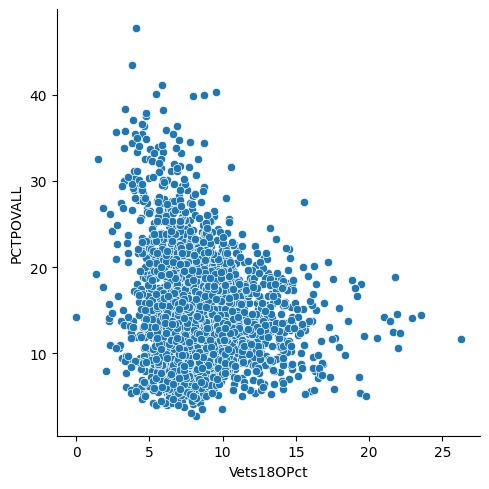

In [85]:
sns.relplot(x="Vets18OPct", y="PCTPOVALL", data=vet_pov_df);

It almost has a trend? Let's add a regression line.

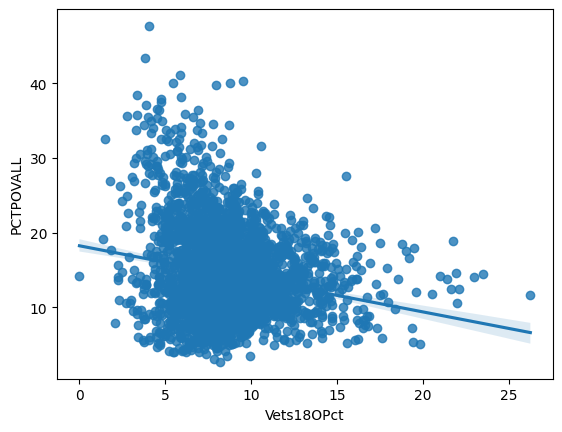

In [135]:
sns.regplot(x="Vets18OPct", y="PCTPOVALL", data=vet_pov_df);

If anything, this vaguely tells me that the trend is the opposite of what I'd expect. Let's go back to the reduced dataframes.

We can take means and medians in a similar fashion as with the WW2 figures. But this time we'll do it using .describe.

In [32]:
least_vet_pov_df.describe()

,FIPS,Vets18OPct,Deep_Pov_All,PCTPOVALL
count,20.000000,20.000000,20.000000,20.000000
mean,38505.900000,2.221900,9.602968,19.005000
std,11303.434592,0.690347,4.589229,7.589499
min,12086.000000,0.000000,1.936620,7.900000
25%,32533.500000,2.008568,6.744065,14.000000
50%,38110.000000,2.324342,8.715448,17.200000
75%,48336.500000,2.738323,12.209213,24.375000
max,51660.000000,2.920723,21.220045,35.700000


In [33]:
most_vet_pov_df.describe()

,FIPS,Vets18OPct,Deep_Pov_All,PCTPOVALL
count,20.000000,20.000000,20.000000,20.000000
mean,34092.650000,20.907176,6.247712,13.170000
std,17046.347876,1.933491,2.180679,3.943696
min,4003.000000,18.541132,2.106762,5.100000
25%,15325.000000,19.379120,5.278655,11.775000
50%,38582.000000,20.768419,6.285854,13.800000
75%,48273.500000,21.939824,7.060607,15.100000
max,53029.000000,26.247891,10.696830,18.900000


Of course, we want to ignore FIPS so we can drop that column if we wish.

In [34]:
most = most_vet_pov_df.drop(columns=['FIPS']).describe() 
least = least_vet_pov_df.drop(columns=['FIPS']).describe()

In [35]:
print('M', most), print('L', least)

M        Vets18OPct  Deep_Pov_All  PCTPOVALL
count   20.000000     20.000000  20.000000
mean    20.907176      6.247712  13.170000
std      1.933491      2.180679   3.943696
min     18.541132      2.106762   5.100000
25%     19.379120      5.278655  11.775000
50%     20.768419      6.285854  13.800000
75%     21.939824      7.060607  15.100000
max     26.247891     10.696830  18.900000
L        Vets18OPct  Deep_Pov_All  PCTPOVALL
count   20.000000     20.000000  20.000000
mean     2.221900      9.602968  19.005000
std      0.690347      4.589229   7.589499
min      0.000000      1.936620   7.900000
25%      2.008568      6.744065  14.000000
50%      2.324342      8.715448  17.200000
75%      2.738323     12.209213  24.375000
max      2.920723     21.220045  35.700000


(None, None)

This appears to support the suggestion made by the graphs above. The opposite of my assumption seems to be true: more veterans, less poverty. There are a few narratives that make sense of this. One being that this data encompasses veterans, not active duty nor the communities that those who serve are recruited from: this data is about the communities that they end up in.

Let's take a closer look at the Veterans.csv but concentrate on percent of vets that are poor as well as percent non vets poor and compare.

In [36]:
most_vet_poor_df = most_vets_df.drop(columns=['GulfWar2VetsPct',
       'GulfWar1VetsPct', 'VietnamEraVetsPct', 'KoreanWarVetsPct',
       'WW2VetsPct', 'MaleVetsPct', 'FemaleVetsPct', 'WhiteNonHispVetsPct',
       'BlackVetsPct', 'HispanicVetsPct', 'OtherRaceVetsPct', 'MedianVetsInc',
       'MedianNonVetsInc', 'LessThanHSVetsPct', 'HighSchOnlyVetsPct',
       'SomeCollegeVetsPct', 'CollegeDegreeVetsPct', 'LFPVetsRate',
       'UEVetsRate', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'CivPopVets18to64Num', 'CivPop18ONum',
       'Vets18ONum', 'NonVetsDisabilty', 'NonVetsPoor', 'VetsDisabilty',
       'VetsPoor', 'CLFVets18to64Num'])
print(most_vet_poor_df)

       FIPS State         County  Vets18OPct  PctVetsPoor  PctNonVetsPoor
940   20061    KS          Geary   26.247891     5.057299       14.748642
491   13179    GA        Liberty   23.512473     7.474774       17.715795
588   16039    ID         Elmore   22.941176     6.731413       19.959640
2712  48281    TX       Lampasas   22.093746     5.357841       14.143843
380   12091    FL       Okaloosa   21.978199     4.652223       12.355782
1598  29169    MO        Pulaski   21.927033     9.961832       17.046908
2707  48271    TX         Kinney   21.728161     8.227848       22.092268
1995  37133    NC         Onslow   21.638796     7.628071       15.564144
2585  48027    TX           Bell   21.405363     6.580592       14.528615
493   13183    GA           Long   20.994170     7.611087       22.812284
2621  48099    TX        Coryell   20.542667     6.712090       12.455302
2966  51199    VA           York   19.802970     1.607278        5.239350
2538  47125    TN     Montgomery   19.

Now I wonder if there's a correlation between percent vets poor (PctVetsPoor) and percent non-vets poor (PctNonVetsPoor). Let's try another graph!

In [37]:
vet_poor_df = veterans_df.drop(columns=['GulfWar2VetsPct',
       'GulfWar1VetsPct', 'VietnamEraVetsPct', 'KoreanWarVetsPct',
       'WW2VetsPct', 'MaleVetsPct', 'FemaleVetsPct', 'WhiteNonHispVetsPct',
       'BlackVetsPct', 'HispanicVetsPct', 'OtherRaceVetsPct', 'MedianVetsInc',
       'MedianNonVetsInc', 'LessThanHSVetsPct', 'HighSchOnlyVetsPct',
       'SomeCollegeVetsPct', 'CollegeDegreeVetsPct', 'LFPVetsRate',
       'UEVetsRate', 'PctVetsDisabilty',
       'PctNonVetsDisabilty', 'CivPopVets18to64Num', 'CivPop18ONum',
       'Vets18ONum', 'NonVetsDisabilty', 'NonVetsPoor', 'VetsDisabilty',
       'VetsPoor', 'CLFVets18to64Num'])

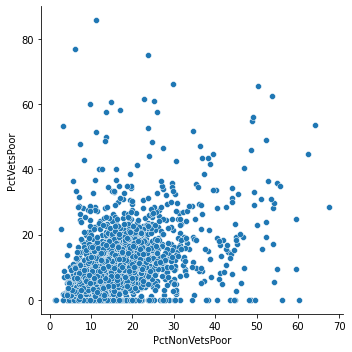

In [38]:
sns.relplot(x="PctNonVetsPoor", y="PctVetsPoor", data=vet_poor_df);

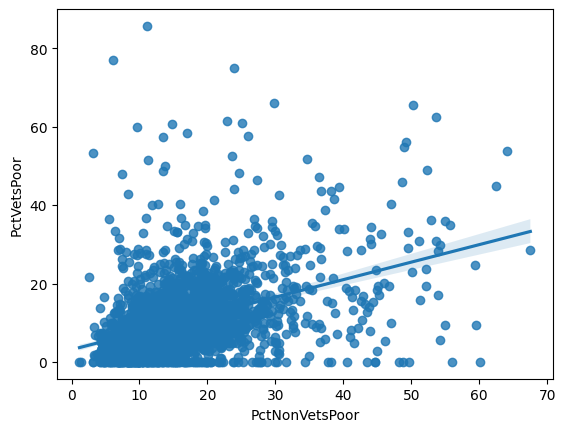

In [39]:
sns.regplot(x="PctNonVetsPoor", y="PctVetsPoor", data=vet_poor_df);

This adds more color to the narrative described above; the percentage of poor or poverty has more to do with the community itself than the veterans in it. If there is a relationship at all!

Can you tell I'm having fun? I'll spare whoever reads this and discontinue the investigation at this point...for now.